Capstone Project Group 07: Property Assessment Analysis - Boston FY2024

Step 1 - Data Extraction

In [1]:
import pandas as pd

# Load the dataset
file_path = "Property_Assessment_FY2024.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display basic info
print("Dataset Info:")
df.info()

# Display first few rows
print("\nPreview of the dataset:")
print(df.head())

# Summary statistics for numeric and object columns
print("\nSummary Statistics:")
print(df.describe(include='all'))  # Removed datetime_is_numeric parameter

# Identify missing values
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Show data types
print("\nData Types of Columns:")
print(df.dtypes.sort_index())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182242 entries, 0 to 182241
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PID                  182242 non-null  int64  
 1   CM_ID                93291 non-null   float64
 2   GIS_ID               182242 non-null  int64  
 3   ST_NUM               172879 non-null  float64
 4   ST_NAME              182242 non-null  object 
 5   UNIT_NUM             82613 non-null   object 
 6   CITY                 182239 non-null  object 
 7   ZIP_CODE             182239 non-null  float64
 8   BLDG_SEQ             182242 non-null  int64  
 9   NUM_BLDGS            182242 non-null  int64  
 10  LUC                  182242 non-null  int64  
 11  LU                   182242 non-null  object 
 12  LU_DESC              182242 non-null  object 
 13  BLDG_TYPE            179626 non-null  object 
 14  OWN_OCC              182242 non-null  object 
 15  OWN

Step 2 - Data Cleanup

In [4]:
# Import cleaning functions
import importlib
import capstone_group07
importlib.reload(capstone_group07)

from capstone_group07 import clean_column_names, convert_currency_to_numeric, handle_missing_values

# Apply Function 1: Clean column names
df = clean_column_names(df)
print("Check Function 1:")
print(df.columns)

# Apply Function 2: Convert currency/object columns to numeric
currency_columns = ['land_value', 'bldg_value', 'total_value', 'gross_tax']
df = convert_currency_to_numeric(df, currency_columns)
print("Check Function 2:")
print(df[currency_columns].dtypes)

# Apply Function 3: Handle missing values (drop or fill)
df_clean = handle_missing_values(df, strategy='fill', fill_value = 0) 
print("Check Function 3:")
print(df_clean.isnull().sum())

Check Function 1:
Index(['pid', 'cm_id', 'gis_id', 'st_num', 'st_name', 'unit_num', 'city',
       'zip_code', 'bldg_seq', 'num_bldgs', 'luc', 'lu', 'lu_desc',
       'bldg_type', 'own_occ', 'owner', 'mail_addressee',
       'mail_street_address', 'mail_city', 'mail_state', 'mail_zip_code',
       'res_floor', 'cd_floor', 'res_units', 'com_units', 'rc_units',
       'land_sf', 'gross_area', 'living_area', 'land_value', 'bldg_value',
       'sfyi_value', 'total_value', 'gross_tax', 'yr_built', 'yr_remodel',
       'structure_class', 'roof_structure', 'roof_cover', 'int_wall',
       'ext_fnished', 'int_cond', 'ext_cond', 'overall_cond', 'bed_rms',
       'full_bth', 'hlf_bth', 'kitchens', 'tt_rms', 'bdrm_cond',
       'bthrm_style1', 'bthrm_style2', 'bthrm_style3', 'kitchen_type',
       'kitchen_style1', 'kitchen_style2', 'kitchen_style3', 'heat_type',
       'heat_system', 'ac_type', 'fireplaces', 'orientation', 'num_parking',
       'prop_view', 'corner_unit'],
      dtype='object')


Step 3 - Data Visualizations

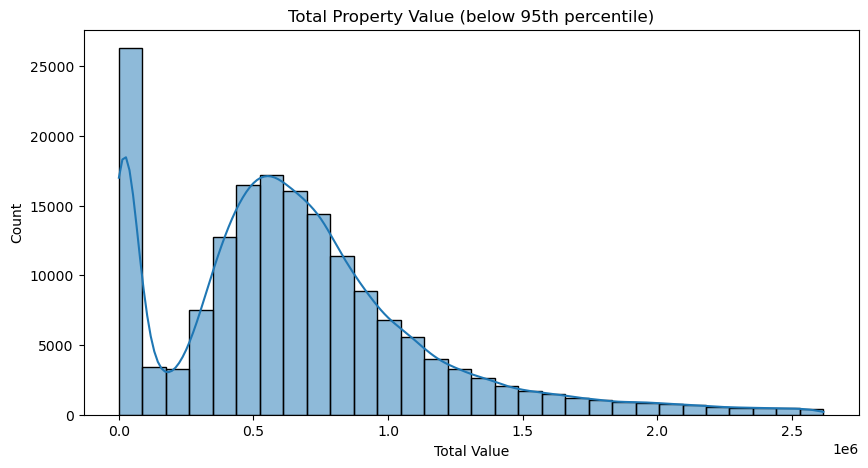

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Total Property Value
# Define upper threshold (e.g., 95th percentile)
threshold = df_clean['total_value'].quantile(0.95)

# Plot values below this threshold
plt.figure(figsize=(10, 5))
sns.histplot(df_clean[df_clean['total_value'] < threshold]['total_value'], bins=30, kde=True)
plt.title('Total Property Value (below 95th percentile)')
plt.xlabel('Total Value')
plt.ylabel('Count')
plt.show()

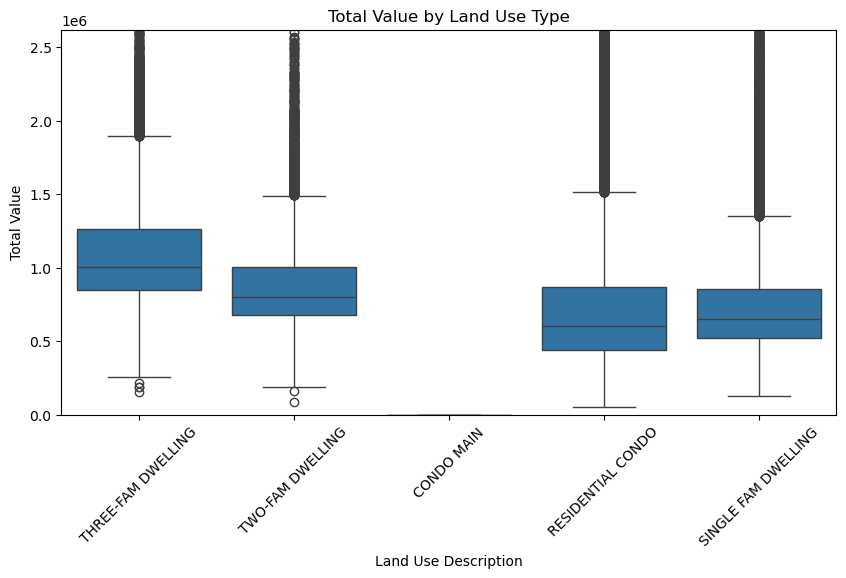

In [6]:
# 2. Boxplot: Total Value by Land Use Description
plt.figure(figsize=(10, 5))
top_lu = df_clean['lu_desc'].value_counts().head(5).index
sns.boxplot(data=df_clean[df_clean['lu_desc'].isin(top_lu)], x='lu_desc', y='total_value')
plt.title('Total Value by Land Use Type')
plt.xlabel('Land Use Description')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.ylim(0, df_clean['total_value'].quantile(0.95))  # Clip y-axis at 95th percentile
plt.show()

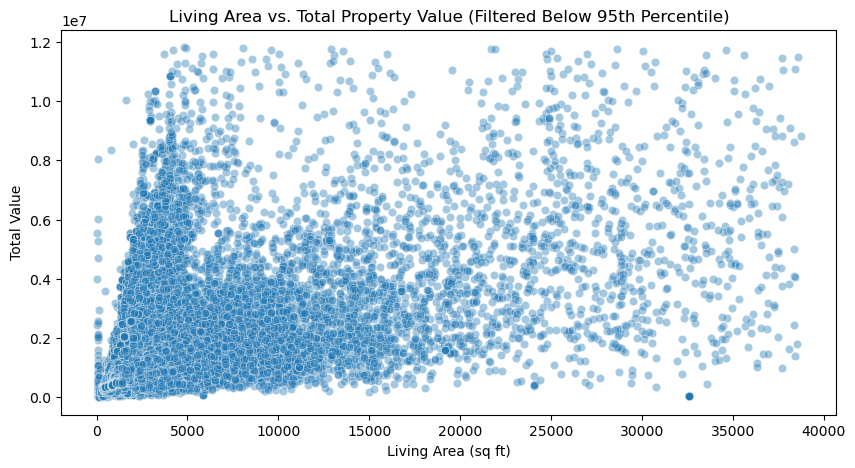

In [7]:
# 3. Scatter Plot: Living Area vs. Total Value

# Define thresholds at the 95th percentile for both axes
living_area_threshold = df_clean['living_area'].quantile(0.99)
total_value_threshold = df_clean['total_value'].quantile(0.99)

# Filter the data - fix the compound comparison by breaking it into separate conditions
filtered_df = df_clean[
    (df_clean['living_area'] > 0) & 
    (df_clean['living_area'] < living_area_threshold) &
    (df_clean['total_value'] > 0) & 
    (df_clean['total_value'] < total_value_threshold)
]

# Plot the cleaned scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_df, x='living_area', y='total_value', alpha=0.4)
plt.title('Living Area vs. Total Property Value (Filtered Below 95th Percentile)')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Total Value')
plt.show()

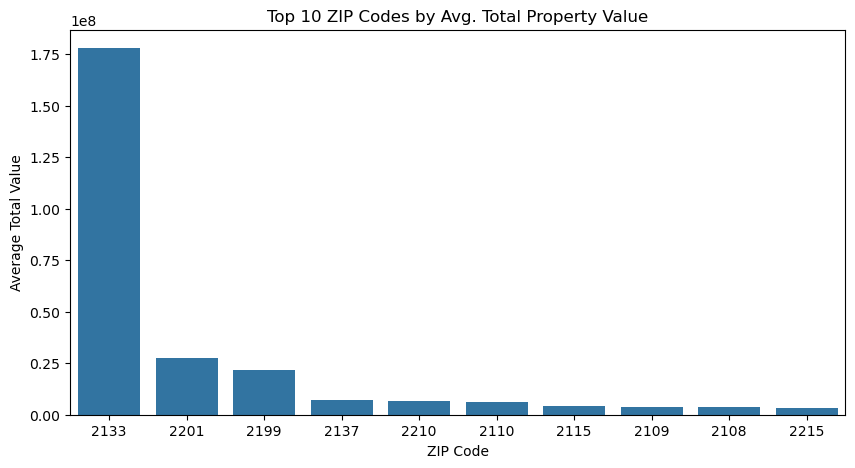

In [8]:
# 4. Bar Chart: Average Total Value by ZIP Code (top 10)
plt.figure(figsize=(10, 5))

# Get top 10 ZIPs by avg. total value
top_zips = df_clean.groupby('zip_code')['total_value'].mean().sort_values(ascending=False).head(10)

# Plot with custom order
sns.barplot(
    x=top_zips.index.astype(int), 
    y=top_zips.values, 
    order=top_zips.index.astype(int)  # this keeps them in descending order
)
plt.title('Top 10 ZIP Codes by Avg. Total Property Value')
plt.xlabel('ZIP Code')
plt.ylabel('Average Total Value')
plt.show()

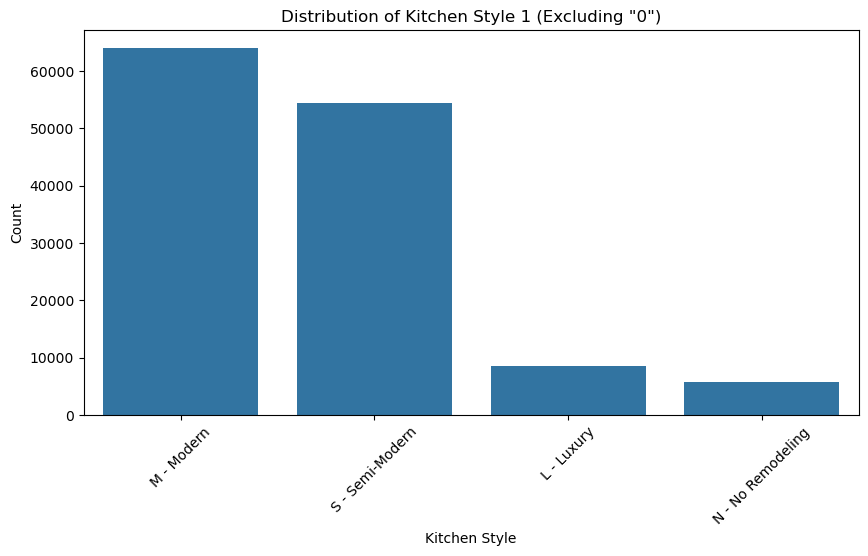

In [9]:
# 5. Count Plot: Kitchen Style
plt.figure(figsize=(10, 5))

# Filter out rows where kitchen_style1 == "0"
filtered_df = df_clean[df_clean['kitchen_style1'].astype(str).str.strip() != "0"]

# Plot again with updated data
sns.countplot(
    data=filtered_df,
    x='kitchen_style1',
    order=filtered_df['kitchen_style1'].value_counts().index
)

plt.title('Distribution of Kitchen Style 1 (Excluding "0")')
plt.xticks(rotation=45)
plt.xlabel('Kitchen Style')
plt.ylabel('Count')
plt.show()

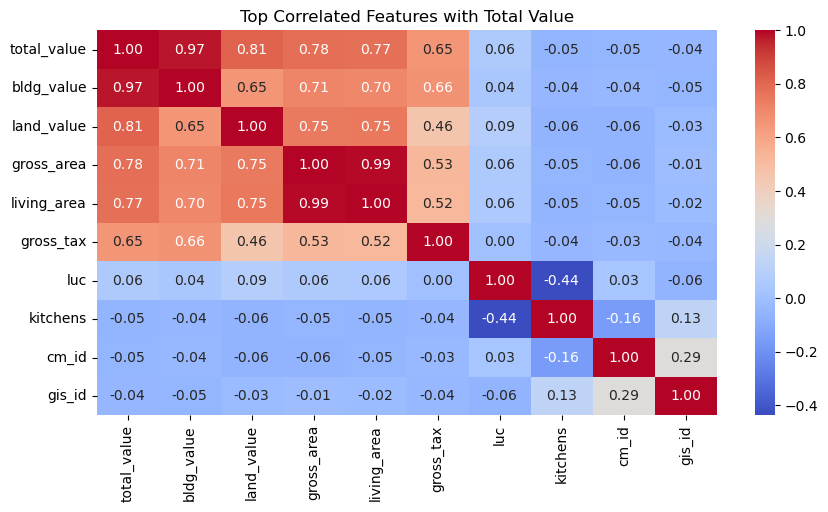

In [10]:
# 6. Correlation Heatmap (numeric columns)
# Compute correlation matrix
numeric_cols = df_clean.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Get top correlations with 'total_value'
top_corr = corr_matrix['total_value'].abs().sort_values(ascending=False).head(10).index

# Plot a smaller focused heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features with Total Value')
plt.show()

Step 4 - Predictive Models

In [11]:
# 4.1 Sample and Prepare Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Sample 15,000 rows for efficiency
df_sample = df_clean.sample(n=15000, random_state=42).copy()

# Drop irrelevant/ID/leakage columns
drop_cols = [
    'pid', 'cm_id', 'gis_id', 'st_num', 'st_name', 'unit_num', 'owner',
    'mail_addressee', 'mail_street_address', 'mail_city', 'mail_state',
    'mail_zip_code', 'total_value', 'sfyi_value', 'gross_tax'
]

X = df_sample.drop(columns=drop_cols)
y = df_sample['total_value']

# Ensure categorical columns are string type
categorical_features = X.select_dtypes(include='object').columns.tolist()
for col in categorical_features:
    X[col] = X[col].astype(str)

# Identify numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# 4.2 Processing Piplines
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For Linear Regression & Random Forest (with OneHotEncoder)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [13]:
# 4.3 Model Evaluation Function
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    print(f"\n{name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE: {mae:,.2f}")

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

evaluate_model("Linear Regression", lr_pipeline, X_train, X_test, y_train, y_test)


Linear Regression Results:
R² Score: 0.9947
RMSE: 370,163.84
MAE: 11,049.23



Random Forest Results:
R² Score: 0.9522
RMSE: 1,108,968.61
MAE: 64,340.47


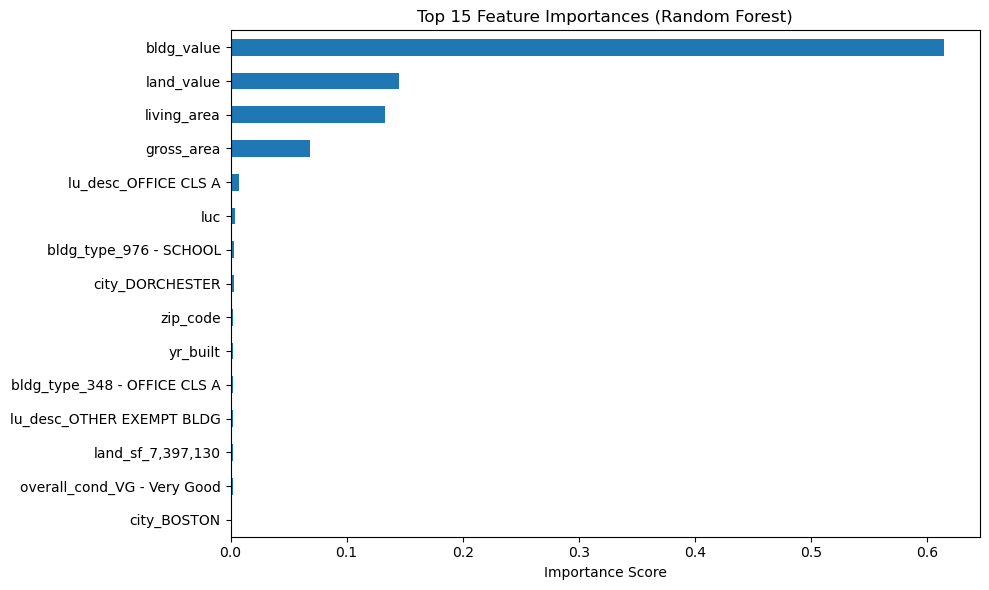

In [15]:
# Random Forest Regressor + Feature Importance Plot
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Train and evaluate
evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test)

# Fit separately to get feature importances
rf_pipeline.fit(X_train, y_train)

# Get one-hot encoded feature names
feature_names = preprocessor.transformers_[0][2] + list(
    rf_pipeline.named_steps['preprocessor']
    .transformers_[1][1]
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

importances = rf_pipeline.named_steps['regressor'].feature_importances_
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)

# Plot top 15 feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
# XGBoost (Top Numeric Features Only)
from xgboost import XGBRegressor

# Choose only top numeric features
top_features = [
    'living_area', 'gross_area', 'land_value', 'bldg_value',
    'full_bth', 'kitchens', 'yr_built'
]

# Drop rows with missing values
df_xgb = df_sample[top_features + ['total_value']].dropna()

X = df_xgb[top_features]
y = df_xgb['total_value']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
preds = xgb_model.predict(X_test)
r2 = r2_score(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print("\nXGBoost (Top Numeric Features Only) Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")


XGBoost (Top Numeric Features Only) Results:
R² Score: 0.2531
RMSE: 4,385,129.73
MAE: 199,211.74
